In [1]:
import os
import sys
import datetime as dt
#import missingno as mno 
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from numpy import log

In [3]:
df= pd.read_csv("soil.csv")
df.set_index(['date'],inplace= True)
df

Magna_6 Wind Direction  Magna_6 Wind Speed (m/s)  \
date                                                                          
2022-05-01 00:02:00+00:00                   226.5                       3.7   
2022-05-01 00:12:00+00:00                   225.6                       2.4   
2022-05-01 00:22:00+00:00                   241.1                       2.9   
2022-05-01 00:32:00+00:00                   238.3                       2.5   
2022-05-01 00:42:00+00:00                   224.9                       3.2   
...                                           ...                       ...   
2022-09-01 23:18:00+00:00                    83.5                       0.7   
2022-09-01 23:28:00+00:00                    62.5                       0.9   
2022-09-01 23:38:00+00:00                    96.0                       1.1   
2022-09-01 23:48:00+00:00                    79.8                       1.2   
2022-09-01 23:58:00+00:00                    94.9                       1.3   

                           Magna_6 Meteo Ambient Temperature (C)  \
date                                                               
2022-05-01 00:02:00+00:00                                    8.4   
2022-05-01 00:12:00+00:00                                    8.3   
2022-05-01 00:22:00+00:00                                    8.3   
2022-05-01 00:32:00+00:00                                    8.3   
2022-05-01 00:42:00+00:00                                    8.3   
...                                                          ...   
2022-09-01 23:18:00+00:00                                   11.5   
2022-09-01 23:28:00+00:00                                   11.7   
2022-09-01 23:38:00+00:00                                   11.7   
2022-09-01 23:48:00+00:00                                   11.7   
2022-09-01 23:58:00+00:00                                   11.8   

                           Magna_6 Meteo Air Pressure (hpa)  \
date                                                          
2022-05-01 00:02:00+00:00                             996.1   
2022-05-01 00:12:00+00:00                             996.1   
2022-05-01 00:22:00+00:00                             996.0   
2022-05-01 00:32:00+00:00                             995.9   
2022-05-01 00:42:00+00:00                             995.8   
...                                                     ...   
2022-09-01 23:18:00+00:00                             996.4   
2022-09-01 23:28:00+00:00                             996.3   
2022-09-01 23:38:00+00:00                             996.2   
2022-09-01 23:48:00+00:00                             996.1   
2022-09-01 23:58:00+00:00                             996.0   

                           Magna_6 Meteo Relative Humidity  \
date                                                         
2022-05-01 00:02:00+00:00                             94.3   
2022-05-01 00:12:00+00:00                             95.5   
2022-05-01 00:22:00+00:00                             95.0   
2022-05-01 00:32:00+00:00                             95.3   
2022-05-01 00:42:00+00:00                             95.5   
...                                                    ...   
2022-09-01 23:18:00+00:00                             95.7   
2022-09-01 23:28:00+00:00                             95.4   
2022-09-01 23:38:00+00:00                             95.3   
2022-09-01 23:48:00+00:00                             95.2   
2022-09-01 23:58:00+00:00                             94.9   

                           Magna_6 Meteo Dew Point Temperature (C)  \
date                                                                 
2022-05-01 00:02:00+00:00                                      7.5   
2022-05-01 00:12:00+00:00                                      7.6   
2022-05-01 00:22:00+00:00                                      7.6   
2022-05-01 00:32:00+00:00                                      7.6   
2022-05-01 00:42:00+00:00                                      7.6 

# create a conda environment
%conda create --name sage python=3.8

# activate conda environment
%conda activate sage 

# install pycaret
%pip install pycaret

# create notebook kernel
%python -m ipykernel install --user --name sage --display-name "sage"


Pycaret TS Model
--

In [4]:
def what_is_installed():
    import pycaret
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except:
   #!pip install prophet
   # !pip install pycaret-ts-alpha
    what_is_installed()


System:
    python: 3.9.12 (main, Apr  5 2022, 01:53:17)  [Clang 12.0.0 ]
executable: /Users/sage/opt/anaconda3/bin/python
   machine: macOS-10.15.7-x86_64-i386-64bit

PyCaret required dependencies:
                 pip: 21.2.4
          setuptools: 61.2.0
             pycaret: 3.0.0rc4
             IPython: 8.2.0
          ipywidgets: 7.6.5
                tqdm: 4.64.0
               numpy: 1.21.5
              pandas: 1.4.2
              jinja2: 3.0.3
               scipy: 1.7.3
              joblib: 1.2.0
             sklearn: 1.1.2
                pyod: 1.0.5
            imblearn: 0.9.1
   category_encoders: 2.5.1.post0
            lightgbm: 3.3.3
               numba: 0.55.1
            requests: 2.27.1
          matplotlib: 3.5.1
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.6.0
             kaleido: 0.2.1
         statsmodels: 0.13.2
              sktime: 0.13.2
               tbats: 1.1.1
            pmdarima: 1.8.5
              psutil: 5.9.4



In [5]:
#%pip install --upgrade pycaret

In [6]:
from pycaret.time_series import TSForecastingExperiment
# Change renderer appropriately based on where the notebook is being run ----
# Refer to plotly for available renderers.
global_plot_settings = {"renderer": "colab",
                        "hoverinfo": "text"}

# init environment

exp = TSForecastingExperiment()
target = 'segment1(10-30cm)'
data_for_modeling = df[df.index < '2022-08-21'].reset_index(drop = True)
future_df = df[df.index >= '2022-08-21'].reset_index(drop = True)
future_exog = future_df.drop(columns=target)

exp.setup(data = data_for_modeling,
          target= target,
          seasonal_period=12,
          fh=1000,
          fig_kwargs=global_plot_settings,
          session_id=140)

In [7]:
# Additional plots provided by PyCaret to help understand what is being done.
exp.plot_model(plot="ts")

In [8]:
#Model training and selection
print("Model training and selection")
#exclude={'arima','auto_arima'}
#best_model = exp.compare_models(sort ="MAE", exclude=exclude)
best_model= exp.create_model('lr_cds_dt')

Model training and selection


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
exp.plot_model(best_model,
               plot = 'forecast')

In [10]:
# Diagnostics plot
exp.plot_model(plot = 'diagnostics')

In [11]:
#tune model
tuned= exp.tune_model(best_model,fold=5)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [12]:
# forecast in unknown future
exp.plot_model(tuned,
               plot = 'forecast',
               data_kwargs = {'fh' : 1000})

In [13]:
# Decomposition plot
exp.plot_model(tuned)

In [14]:
# finalize model
final_best =exp.finalize_model(tuned)
print(final_best)

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1),
                                                                                    sp=12,
                                                                                    window_length=12))]))])


In [15]:
# generate predictions
preds= exp.predict_model(final_best,fh=1716,X=future_exog)
print(preds)

        y_pred
16093  65.2842
16094  65.4152
16095  65.5005
16096  65.3478
16097  65.4997
...        ...
17804  54.7025
17805  54.7341
17806  54.8117
17807  54.7895
17808  54.6024

[1716 rows x 1 columns]


In [16]:
y_train= data_for_modeling['segment1(10-30cm)']
#y_train=exp.get_config("y_train")
print(y_train)

0        92.72
1        94.61
2        94.57
3        95.82
4        97.30
         ...  
16088    65.50
16089    65.50
16090    65.46
16091    65.43
16092    65.44
Name: segment1(10-30cm), Length: 16093, dtype: float64


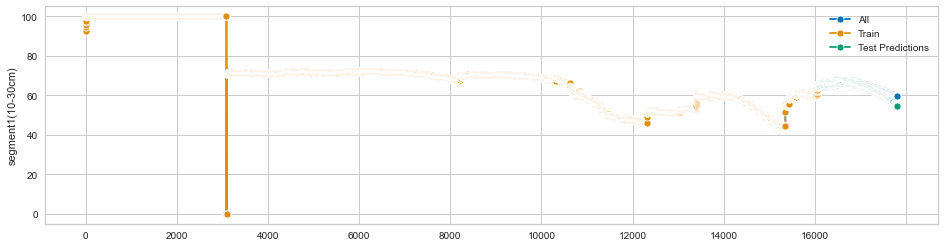

In [17]:
data=df['segment1(10-30cm)'].reset_index(drop=True)
from sktime.utils.plotting import plot_series
plot_series(data,
            y_train,
            preds,
            labels=['All', 'Train', 'Test Predictions'])
plt.show()

In [18]:
# save the model
exp.save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1),
                                                                                                                                                     sp=12,
                                                                                                                                                     window_length=12))]))]))]))]),
 'my_best_model.pkl')

BORUTA
--

In [19]:
#Installing Boruta
#!pip install Boruta
# Boruta for feature selection
#!pip install boruta_py
from sklearn.ensemble import RandomForestRegressor
from boruta import  BorutaPy
from sklearn.metrics import accuracy_score 

In [20]:
X_new = df.drop(columns =["segment1(10-30cm)"]).reset_index(drop=True)
X_new

Magna_6 Wind Direction  Magna_6 Wind Speed (m/s)  \
0                       226.5                       3.7   
1                       225.6                       2.4   
2                       241.1                       2.9   
3                       238.3                       2.5   
4                       224.9                       3.2   
...                       ...                       ...   
17804                    83.5                       0.7   
17805                    62.5                       0.9   
17806                    96.0                       1.1   
17807                    79.8                       1.2   
17808                    94.9                       1.3   

       Magna_6 Meteo Ambient Temperature (C)  \
0                                        8.4   
1                                        8.3   
2                                        8.3   
3                                        8.3   
4                                        8.3   
...                                      ...   
17804                                   11.5   
17805                                   11.7   
17806                                   11.7   
17807                                   11.7   
17808                                   11.8   

       Magna_6 Meteo Air Pressure (hpa)  Magna_6 Meteo Relative Humidity  \
0                                 996.1                             94.3   
1                                 996.1                             95.5   
2                                 996.0                             95.0   
3                                 995.9                             95.3   
4                                 995.8                             95.5   
...                                 ...                              ...   
17804                             996.4                             95.7   
17805                             996.3                             95.4   
17806                             996.2                             95.3   
17807                             996.1                             95.2   
17808                             996.0                             94.9   

       Magna_6 Meteo Dew Point Temperature (C)  Power Supply (V)  \
0                                          7.5            13.089   
1                                          7.6            13.089   
2                                          7.6            13.089   
3                                          7.6            13.089   
4                                          7.6            13.089   
...                                        ...               ...   
17804                                     10.9            13.115   
17805                                     11.0            13.115   
17806                                     11.0            13.115   
17807                                     11.0            13.115   
17808                                     11.0            13.103   

       Magna_6 Water EC muS/cm  Magna_6 Water Level Above Sensor mm  \
0                        422.8                               1754.6   
1                        422.9                               1754.5   
2                        422.8                               1754.5   
3                        422.9                               1754.7   
4                        422.8                               1754.7   
...                        ...                                  ...   
17804                    299.1                               1460.2   
17805                    299.2                               1460.1   
17806                    299.3                               1460.2   
17807                    299.2                               1460.1   
17808                    299.2                               1460.1   

       segment1(EC)  ...  Air Pressure (x10)  Relative Humidity (x10)  \
0              2.16  ...                9961                     

In [21]:
y_new = df["segment1(10-30cm)"].reset_index(drop=True)
y_new

0        92.72
1        94.61
2        94.57
3        95.82
4        97.30
         ...  
17804    59.56
17805    59.56
17806    59.58
17807    59.60
17808    59.59
Name: segment1(10-30cm), Length: 17809, dtype: float64

In [22]:
#Initializing the random forest model
model = RandomForestRegressor(n_estimators = 100,
                              max_depth = 5,
                              random_state = 42)
# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)

In [23]:
#Training the boruta, X and Y mus be numpy arrays
import numpy as np
feat_selector.fit(np.array(X_new), np.array(y_new))

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	16
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 10
Confirmed: 	16
Tentative: 	3
Rejected: 	7


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	16
Tentative: 	2
Rejected: 	7


BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=123,
                                         random_state=RandomState(MT19937) at 0x7FB365451440),
         max_iter=10, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FB365451440, verbose=2)

In [24]:
accepted = X_new.columns[feat_selector.support_].to_list()
print('Accepted features:', accepted)

Accepted features: ['Magna_6 Meteo Air Pressure (hpa)', 'Magna_6 Meteo Dew Point Temperature (C)', 'Magna_6 Water EC muS/cm', 'Magna_6 Water Level Above Sensor mm', 'segment1(EC)', 'Magna_6 PH', 'Magna_6 ORP_mV', 'Magna_6 pH_Sensor_Temperature_C', 'Air Pressure (x10)', 'Dew Point Temperature (x10)', 'Magna_6 Cumulative Precipitation_mm', 'Magna_6 CTD_Temperature_C', 'CTD_Pressure_BAR', 'CTD_Conductivity__mS', 'Metres above MSL', 'TOW _MH2O']


In [25]:
undecided = X_new.columns[feat_selector.support_weak_].to_list()
print('Undecided features', undecided)

Undecided features ['Magna_6 Wind Direction', 'Wind Direction (x10)']


In [26]:
selected_features = accepted + undecided # include undecided for safe measure
df_new=df.copy()
df_boruta = df_new.loc[:,selected_features]
df_boruta["segment1(10-30cm)"]= df["segment1(10-30cm)"]
df_boruta

Magna_6 Meteo Air Pressure (hpa)  \
date                                                          
2022-05-01 00:02:00+00:00                             996.1   
2022-05-01 00:12:00+00:00                             996.1   
2022-05-01 00:22:00+00:00                             996.0   
2022-05-01 00:32:00+00:00                             995.9   
2022-05-01 00:42:00+00:00                             995.8   
...                                                     ...   
2022-09-01 23:18:00+00:00                             996.4   
2022-09-01 23:28:00+00:00                             996.3   
2022-09-01 23:38:00+00:00                             996.2   
2022-09-01 23:48:00+00:00                             996.1   
2022-09-01 23:58:00+00:00                             996.0   

                           Magna_6 Meteo Dew Point Temperature (C)  \
date                                                                 
2022-05-01 00:02:00+00:00                                      7.5   
2022-05-01 00:12:00+00:00                                      7.6   
2022-05-01 00:22:00+00:00                                      7.6   
2022-05-01 00:32:00+00:00                                      7.6   
2022-05-01 00:42:00+00:00                                      7.6   
...                                                            ...   
2022-09-01 23:18:00+00:00                                     10.9   
2022-09-01 23:28:00+00:00                                     11.0   
2022-09-01 23:38:00+00:00                                     11.0   
2022-09-01 23:48:00+00:00                                     11.0   
2022-09-01 23:58:00+00:00                                     11.0   

                           Magna_6 Water EC muS/cm  \
date                                                 
2022-05-01 00:02:00+00:00                    422.8   
2022-05-01 00:12:00+00:00                    422.9   
2022-05-01 00:22:00+00:00                    422.8   
2022-05-01 00:32:00+00:00                    422.9   
2022-05-01 00:42:00+00:00                    422.8   
...                                            ...   
2022-09-01 23:18:00+00:00                    299.1   
2022-09-01 23:28:00+00:00                    299.2   
2022-09-01 23:38:00+00:00                    299.3   
2022-09-01 23:48:00+00:00                    299.2   
2022-09-01 23:58:00+00:00                    299.2   

                           Magna_6 Water Level Above Sensor mm  segment1(EC)  \
date                                                                           
2022-05-01 00:02:00+00:00                               1754.6          2.16   
2022-05-01 00:12:00+00:00                               1754.5          2.17   
2022-05-01 00:22:00+00:00                               1754.5          2.17   
2022-05-01 00:32:00+00:00                               1754.7          2.17   
2022-05-01 00:42:00+00:00                               1754.7          2.17   
...                                                        ...           ...   
2022-09-01 23:18:00+00:00                               1460.2          2.08   
2022-09-01 23:28:00+00:00                               1460.1          2.08   
2022-09-01 23:38:00+00:00                               1460.2          2.08   
2022-09-01 23:48:00+00:00                               1460.1          2.08   
2022-09-01 23:58:00+00:00                               1460.1          2.08   

                           Magna_6 PH  Magna_6 ORP_mV  \
date                                                    
2022-05-01 00:02:00+00:00     8.50717        -539.455   
2022-05-01 00:12:00+00:00     8.28870        -540.100   
2022-05-01 00:22:00+00:00     8.32652        -540.136   
2022-05-01 00:32:00+00:00     8.32372        -540.064   
2022-05-01 00:42:00+00:00     8.33002        -539.885   
...                               ...             ...   
2022-09-01 23:18:00+00:00     6.47253        -468.948   
2022-09-01 23:28:00+00:00     6.47382  

In [27]:
corr=df_boruta.copy().corr()
corr

Magna_6 Meteo Air Pressure (hpa)  \
Magna_6 Meteo Air Pressure (hpa)                                 1.000000   
Magna_6 Meteo Dew Point Temperature (C)                         -0.131619   
Magna_6 Water EC muS/cm                                          0.103464   
Magna_6 Water Level Above Sensor mm                             -0.094988   
segment1(EC)                                                    -0.137962   
Magna_6 PH                                                       0.082165   
Magna_6 ORP_mV                                                  -0.155523   
Magna_6 pH_Sensor_Temperature_C                                  0.192520   
Air Pressure (x10)                                               1.000000   
Dew Point Temperature (x10)                                     -0.131619   
Magna_6 Cumulative Precipitation_mm                              0.165822   
Magna_6 CTD_Temperature_C                                        0.174840   
CTD_Pressure_BAR                                                -0.094988   
CTD_Conductivity__mS                                             0.103454   
Metres above MSL                                                -0.106682   
TOW _MH2O                                                       -0.057669   
Magna_6 Wind Direction                                          -0.083779   
Wind Direction (x10)                                            -0.083779   
segment1(10-30cm)                                               -0.029183   

                                         Magna_6 Meteo Dew Point Temperature (C)  \
Magna_6 Meteo Air Pressure (hpa)                                       -0.131619   
Magna_6 Meteo Dew Point Temperature (C)                                 1.000000   
Magna_6 Water EC muS/cm                                                 0.206611   
Magna_6 Water Level Above Sensor mm                                    -0.051665   
segment1(EC)                                                           -0.289109   
Magna_6 PH                                                              0.105382   
Magna_6 ORP_mV                                                         -0.395849   
Magna_6 pH_Sensor_Temperature_C                                         0.417162   
Air Pressure (x10)                                                     -0.131619   
Dew Point Temperature (x10)                                             1.000000   
Magna_6 Cumulative Precipitation_mm                                     0.474773   
Magna_6 CTD_Temperature_C                                               0.499480   
CTD_Pressure_BAR                                                       -0.051664   
CTD_Conductivity__mS                                                    0.206614   
Metres above MSL                                                        0.198146   
TOW _MH2O                                                               0.305166   
Magna_6 Wind Direction                                                  0.099362   
Wind Direction (x10)                                                    0.099362   
segment1(10-30cm)                                                      -0.474547   

                                         Magna_6 Water EC muS/cm  \
Magna_6 Meteo Air Pressure (hpa)                        0.103464   
Magna_6 Meteo Dew Point Temperature (C)                 0.206611   
Magna_6 Water EC muS/cm                                 1.000000   
Magna_6 Water Level Above Sensor mm                     0.701817   
segment1(EC)                                           -0.497290   
Magna_6 PH                                             -0.222858   
Magna_6 ORP_mV                                         -0.331335   
Magna_6 pH_Sensor_Temperature_C                         0.143040   
Air Pressure (x10)                                      0.103464   
Dew Point Temperature (x10)                             0.206611   
Magna_6 Cumulative Precipitation_mm                     0.324802   
Mag

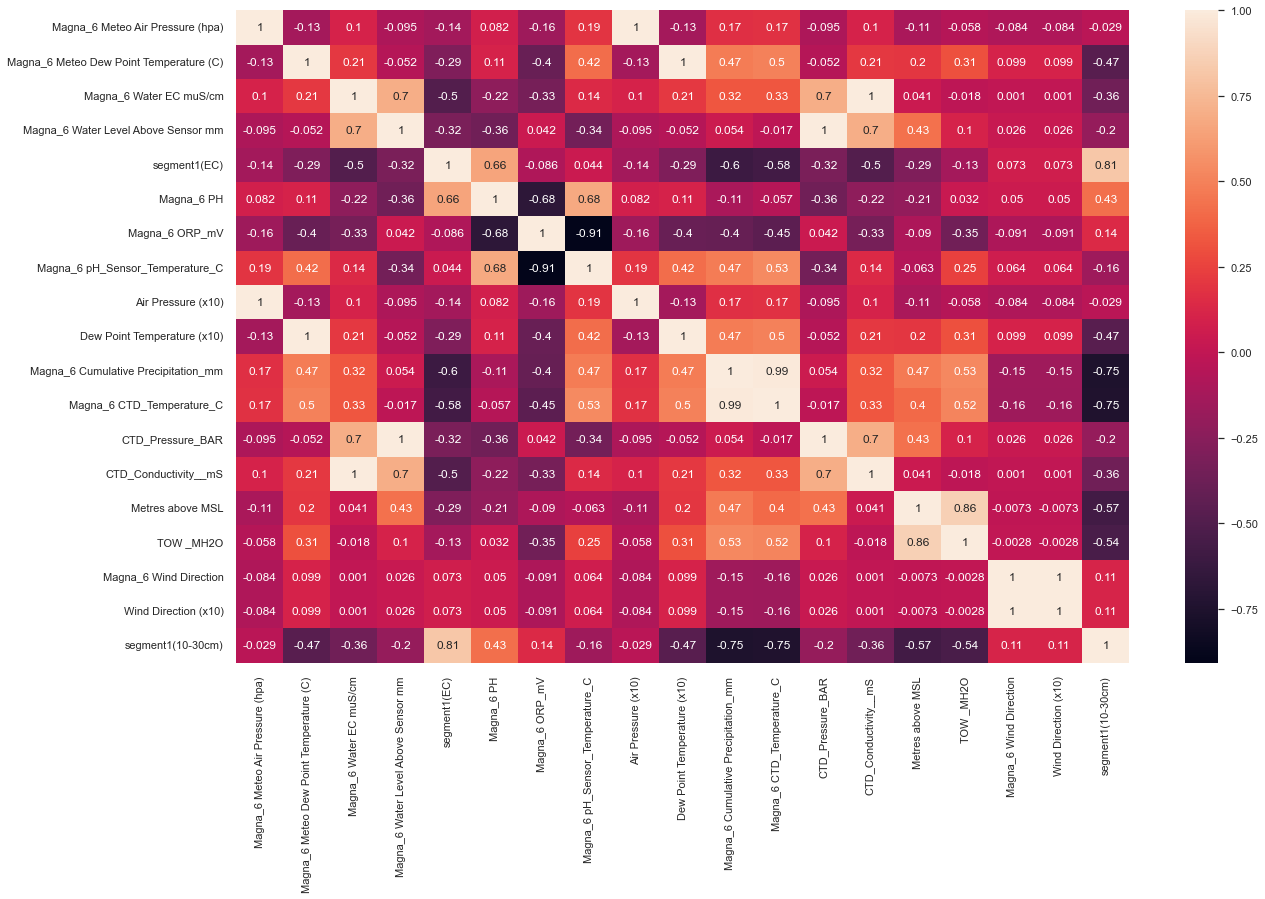

In [28]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(corr, annot=True)
plt.show()

In [29]:

highly_corr = {}
for columns in corr.columns:
  highly_corr[columns] = list(corr[columns][corr[columns]> 0.99].index)
highly_corr


{'Magna_6 Meteo Air Pressure (hpa)': ['Magna_6 Meteo Air Pressure (hpa)',
  'Air Pressure (x10)'],
 'Magna_6 Meteo Dew Point Temperature (C)': ['Magna_6 Meteo Dew Point Temperature (C)',
  'Dew Point Temperature (x10)'],
 'Magna_6 Water EC muS/cm': ['Magna_6 Water EC muS/cm',
  'CTD_Conductivity__mS'],
 'Magna_6 Water Level Above Sensor mm': ['Magna_6 Water Level Above Sensor mm',
  'CTD_Pressure_BAR'],
 'segment1(EC)': ['segment1(EC)'],
 'Magna_6 PH': ['Magna_6 PH'],
 'Magna_6 ORP_mV': ['Magna_6 ORP_mV'],
 'Magna_6 pH_Sensor_Temperature_C': ['Magna_6 pH_Sensor_Temperature_C'],
 'Air Pressure (x10)': ['Magna_6 Meteo Air Pressure (hpa)',
  'Air Pressure (x10)'],
 'Dew Point Temperature (x10)': ['Magna_6 Meteo Dew Point Temperature (C)',
  'Dew Point Temperature (x10)'],
 'Magna_6 Cumulative Precipitation_mm': ['Magna_6 Cumulative Precipitation_mm'],
 'Magna_6 CTD_Temperature_C': ['Magna_6 CTD_Temperature_C'],
 'CTD_Pressure_BAR': ['Magna_6 Water Level Above Sensor mm',
  'CTD_Pressure_B

In [30]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Magna_6 Meteo Air Pressure (hpa) to segment1(10-30cm)
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Meteo Air Pressure (hpa)         0 non-null      float64
 1   Magna_6 Meteo Dew Point Temperature (C)  1 non-null      float64
 2   Magna_6 Water EC muS/cm                  2 non-null      float64
 3   Magna_6 Water Level Above Sensor mm      3 non-null      float64
 4   segment1(EC)                             4 non-null      float64
 5   Magna_6 PH                               5 non-null      float64
 6   Magna_6 ORP_mV                           6 non-null      float64
 7   Magna_6 pH_Sensor_Temperature_C          7 non-null      float64
 8   Air Pressure (x10)                       8 non-null      float64
 9   Dew Point Temperature (x10)              9 non-null      float64
 10  Magna_6 Cum

In [31]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['Air Pressure (x10)',
 'Dew Point Temperature (x10)',
 'Magna_6 CTD_Temperature_C',
 'CTD_Pressure_BAR',
 'CTD_Conductivity__mS',
 'Wind Direction (x10)']

In [32]:
df_boruta = df_boruta.drop(df_boruta[to_drop], axis=1)
df_boruta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17809 entries, 2022-05-01 00:02:00+00:00 to 2022-09-01 23:58:00+00:00
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Meteo Air Pressure (hpa)         17809 non-null  float64
 1   Magna_6 Meteo Dew Point Temperature (C)  17809 non-null  float64
 2   Magna_6 Water EC muS/cm                  17809 non-null  float64
 3   Magna_6 Water Level Above Sensor mm      17809 non-null  float64
 4   segment1(EC)                             17809 non-null  float64
 5   Magna_6 PH                               17809 non-null  float64
 6   Magna_6 ORP_mV                           17809 non-null  float64
 7   Magna_6 pH_Sensor_Temperature_C          17809 non-null  float64
 8   Magna_6 Cumulative Precipitation_mm      17809 non-null  int64  
 9   Metres above MSL                         17809 non-null  float64
 10  TOW _MH

In [33]:
from pycaret.time_series import TSForecastingExperiment

# Change renderer appropriately based on where the notebook is being run ----
# Refer to plotly for available renderers.
global_plot_settings = {"renderer": "colab",
                        "hoverinfo": "text"}
# init environment
from pycaret.regression import *
exp_b = TSForecastingExperiment()
target="segment1(10-30cm)"
data_for_boruta = df_boruta[df_boruta.index < '2022-08-21'].reset_index(drop = True)
future_boruta = df_boruta[df_boruta.index >= '2022-08-21'].reset_index(drop = True)
future_exog_boruta = future_boruta.drop(columns=target)

exp_b.setup(data = data_for_boruta,
          target= target,
          seasonal_period=12,
          fh=1000,
          fig_kwargs=global_plot_settings,
          session_id=143)

In [34]:
exp_b.models()

Name  \
ID                                                                   
naive                                             Naive Forecaster   
grand_means                                 Grand Means Forecaster   
snaive                                   Seasonal Naive Forecaster   
arima                                                        ARIMA   
auto_arima                                              Auto ARIMA   
croston                                                    Croston   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
xgboost_cds_dt   Extreme Gradient Boosting w/ Cond. Deseasonali...   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
catboost_cds_dt  CatBoost Regressor w/ Cond. Deseasonalize & De...   

                                                         Reference  Turbo  
ID                                                                         
naive                     sktime.forecasting.naive.NaiveForecaster   True  
grand_means               sktime.forecasting.naive.NaiveForecaster   True  
snaive                    sktime.forecasting.naive.NaiveForecaster   True  
arima                               sktime.forecasting.arima.ARIMA   True  
auto_arima                      sktime.forecasting.arima.AutoARIMA   True  
croston                         sktime.forecasting.croston.Croston   True  
lr_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
en_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
ridge_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
lasso_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
lar_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
llar_cds_dt      pycaret.containers.models.time_series.BaseCdsD...   True  
br_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
huber_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
par_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
omp_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
knn_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
dt_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
rf_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
et_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
gbr_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
ada_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
xgboost_cds_dt   pycaret.containers.models.time_series.BaseCdsD...   True  
lightgbm_cds_dt  pycaret.containers.models.time_series.BaseCdsD...   True  
catboost_cds_dt  pycaret.containers.models.time_series.BaseCdsD...   True

In [35]:
#compare models with boruta data
#best_boruta= exp_b.compare_models(sort ="MAE", exclude={'arima','auto_arima','lightgbm_cds_dt'})# remove the slow models and the ones causing the kernel to crash
best_boruta= exp_b.create_model('omp_cds_dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
# Additional plots provided by PyCaret to help understand what is being done.
exp_b.plot_model(plot="train_test_split")

In [37]:
#tune model
tuned_boruta= exp_b.tune_model(best_model,fold=5)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.2s finished


In [38]:
# forecast in unknown future
exp_b.plot_model(tuned_boruta,
               plot = 'forecast',
               data_kwargs = {'fh' : 1000})

In [39]:
# Diagnostics plot
exp_b.plot_model(tuned_boruta, plot = 'diagnostics')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [40]:
# finalize model
final_boruta = exp_b.finalize_model(tuned_boruta)
print(final_boruta)

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(degree=2,
                                                                                    regressor=LinearRegression(fit_intercept=False,
                                                                                                               n_jobs=-1,
                                                                                                               normalize=True),
                                                                                    sp=24,
                                                                                    window_length=23))]))])


In [41]:
# generate predictions
preds_boruta= exp_b.predict_model(final_boruta,fh=1716,X=future_exog_boruta)
print(preds_boruta)

        y_pred
16093  65.4037
16094  65.4800
16095  65.4927
16096  65.5276
16097  65.3837
...        ...
17804  77.0161
17805  77.0871
17806  77.0868
17807  77.0862
17808  77.0978

[1716 rows x 1 columns]


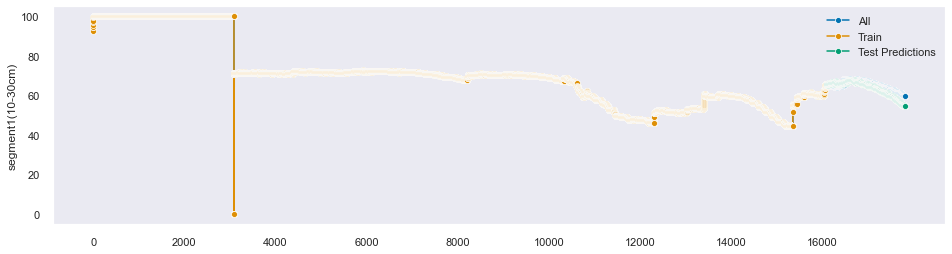

In [42]:
y_train= data_for_boruta['segment1(10-30cm)']
data=df_boruta['segment1(10-30cm)'].reset_index(drop=True)
from sktime.utils.plotting import plot_series
plot_series(data,
            y_train,
            preds,
            labels=['All', 'Train', 'Test Predictions'])
plt.grid()

In [43]:
# save the model
exp.save_model(final_best, 'my_boruta_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1),
                                                                                                                                                     sp=12,
                                                                                                                                                     window_length=12))]))]))]))]),
 'my_boruta_model.pkl')

In [44]:
normal=preds.reset_index()
normal

index   y_pred
0     16093  65.2842
1     16094  65.4152
2     16095  65.5005
3     16096  65.3478
4     16097  65.4997
...     ...      ...
1711  17804  54.7025
1712  17805  54.7341
1713  17806  54.8117
1714  17807  54.7895
1715  17808  54.6024

[1716 rows x 2 columns]

In [45]:
boruta=preds_boruta.reset_index()
boruta= boruta.rename(columns= {"y_pred":"boruta"})

In [46]:
future_boruta['segment1(10-30cm)']

0       65.44
1       65.41
2       65.45
3       65.44
4       65.42
        ...  
1711    59.56
1712    59.56
1713    59.58
1714    59.60
1715    59.59
Name: segment1(10-30cm), Length: 1716, dtype: float64

In [47]:
predictions= pd.concat([future_boruta['segment1(10-30cm)'],normal['y_pred'],boruta['boruta']], axis= 1)

In [48]:
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [49]:
predictions.iplot()

In [50]:
%pip install pandoc

Note: you may need to restart the kernel to use updated packages.
